<a href="https://colab.research.google.com/github/shaimaeid/Tensorflow/blob/master/Pneumonia_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset
Dataset is taken from the "Chest X-Ray Images (Pneumonia)" provided by Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) The files of the dataset in use is hosted at my google drive which is mounted to this environment.

In [4]:
mainDIR = os.listdir('/content/drive/My Drive/data/')
print(mainDIR)

['train', '.ipynb_checkpoints', 'test', 'val']


In [5]:
train_folder= '/content/drive/My Drive/data/train/'
test_folder = '/content/drive/My Drive/data/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
#Normal pic 
train_n_dir=os.listdir(train_n)
print(len(train_n_dir))
print(train_n_dir[:10])
rand_norm= np.random.randint(0,len(train_n_dir))
norm_pic = train_n_dir[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
train_p_dir=os.listdir(train_p)
print(len(train_p_dir))
print(train_p_dir[:10])
rand_p = np.random.randint(0,len(train_p_dir))

sic_pic =  train_p_dir[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)



1250
['NORMAL2-IM-0619-0001.jpeg', 'NORMAL2-IM-0630-0001.jpeg', 'NORMAL2-IM-0648-0001.jpeg', 'NORMAL2-IM-0647-0001.jpeg', 'NORMAL2-IM-0604-0001.jpeg', 'NORMAL2-IM-0641-0001.jpeg', 'NORMAL2-IM-0634-0001.jpeg', 'NORMAL2-IM-0680-0001.jpeg', 'NORMAL2-IM-0671-0001.jpeg', 'NORMAL2-IM-0667-0001.jpeg']
normal picture title:  IM-0275-0001.jpeg
1250
['person413_bacteria_1830.jpeg', 'person438_bacteria_1889.jpeg', 'person441_bacteria_1911.jpeg', 'person417_bacteria_1842.jpeg', 'person438_bacteria_1891.jpeg', 'person450_bacteria_1941.jpeg', 'person459_bacteria_1957.jpeg', 'person417_virus_850.jpeg', 'person413_bacteria_1828.jpeg', 'person441_bacteria_1916.jpeg']
pneumonia picture title: person146_virus_296.jpeg


Text(0.5, 1.0, 'Pneumonia')

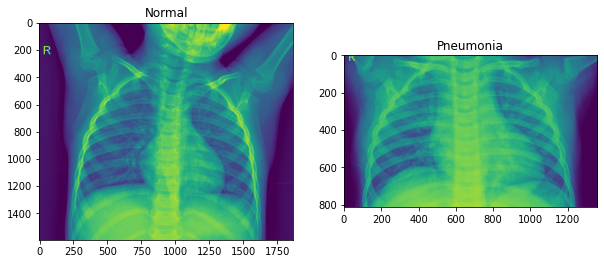

In [8]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [9]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 512))
cnn.add(Dense(activation = 'sigmoid', units = 1))


# Image change through CNN layers
we resized images to be 64X64 pixels, at the first convolution we lost 2 pixel (padding) then the quartered pixels at pooling layer so at the first convlution and pooling the image compressed to 31X31 pixels

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [11]:
from tensorflow.keras.optimizers import RMSprop

cnn.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

## Preprocessing Images
Images on the dataset might come in all shapes and
sizes and unfortunately for training a neural network,
the input data all has to be the same size,
so the images will need to be
resized to make them consistent.
in the next code bloack, I use ImageDataGenerator class to rescale images, label images and feed them in batches to my CNN. 
The flow_from_directory method read the directory structure and turn it into labels. we have 2 folders inside our trianing folder: NORMAL and PNEUMONIA and these will be our binary classes.

In [13]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
print("Traning Set")

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/data/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'binary')
print("\nValidation Set")
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data/test/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')



Traning Set
Found 2500 images belonging to 2 classes.

Validation Set
Found 768 images belonging to 2 classes.


In [14]:
print(train_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


# Training the Model

In [32]:
  history = cnn.fit(
      train_generator,
      steps_per_epoch=125,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
125/125 [==============================] - 122s 977ms/step - loss: 0.2922 - accuracy: 0.8860 - val_loss: 0.6443 - val_accuracy: 0.7070
Epoch 2/15
125/125 [==============================] - 87s 700ms/step - loss: 0.2592 - accuracy: 0.8976 - val_loss: 0.2532 - val_accuracy: 0.8945
Epoch 3/15
125/125 [==============================] - 74s 596ms/step - loss: 0.2850 - accuracy: 0.9068 - val_loss: 0.2334 - val_accuracy: 0.8984
Epoch 4/15
125/125 [==============================] - 58s 465ms/step - loss: 0.2236 - accuracy: 0.9144 - val_loss: 0.2274 - val_accuracy: 0.9023
Epoch 5/15
125/125 [==============================] - 47s 373ms/step - loss: 0.2153 - accuracy: 0.9252 - val_loss: 0.2227 - val_accuracy: 0.9102
Epoch 6/15
125/125 [==============================] - 44s 348ms/step - loss: 0.1944 - accuracy: 0.9260 - val_loss: 0.2303 - val_accuracy: 0.9023
Epoch 7/15
125/125 [==============================] - 45s 360ms/step - loss: 0.1784 - accuracy: 0.9336 - val_loss: 0.2216 - val_a

# Running the Model
Here we can try our model with new images from other sources than the dataset.

In [54]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a PNEUMONIA")
  else:
    print(fn + " is a NORMAL")

Saving NORMAL2-IM-1430-0001.jpeg to NORMAL2-IM-1430-0001.jpeg
[1.]
NORMAL2-IM-1430-0001.jpeg is a PNEUMONIA


# Visualization

In [39]:
scores = cnn.evaluate(validation_generator)
print("\n%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

24/24 [==============================] - 8s 323ms/step - loss: 0.2497 - accuracy: 0.9115

accuracy: 91.15%


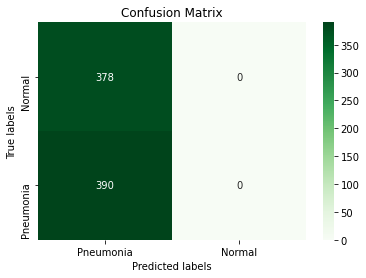

In [49]:


Y_pred = cnn.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pneumonia', 'Normal']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia']);



In [50]:
max(y_pred)

0

[0.8859999775886536, 0.897599995136261, 0.9067999720573425, 0.9143999814987183, 0.9251999855041504, 0.9259999990463257, 0.9336000084877014, 0.925599992275238, 0.9372000098228455, 0.9452000260353088, 0.9423999786376953, 0.9416000247001648, 0.9467999935150146, 0.9431999921798706, 0.9488000273704529]


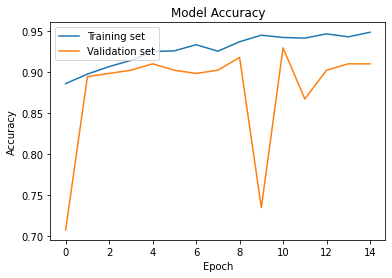

In [51]:
# Accuracy 
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

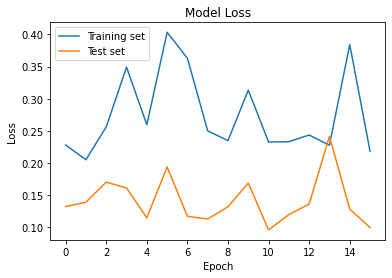

In [ ]:
# Loss 

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()